In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure
import seaborn as sns; sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Problem 1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Domain: Media

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


# Data Ingestion: 

# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.


# Read dataset:

In [156]:
df = pd.read_excel('Election_Data.xlsx')

In [39]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [157]:
df_media = df.drop('Unnamed: 0',axis=1)

In [158]:
df_media.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


# Descriptive Statistics:

In [5]:
df_media.shape

(1525, 9)

In [6]:
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [7]:
df_media.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
df_media['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [9]:
df_media['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [10]:
df_media.duplicated().sum()

8

# Null-Value Check:

In [11]:
df_media.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

# **Data Types Check**

In [293]:
df_media.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

# Data Skewness

**Skew = 3 * (Mean – Median) / Standard Deviation**

In [4]:
Age = 3 * (54.182295 - 53.0) / 15.711209
economic_cond_national = 3 * (3.245902- 3.0) / 0.880969
economic_cond_household = 3 * (3.140328- 3.0) / 0.929951
Blair = 3 * (3.334426 - 4.0) / 1.174824
Hague = 3 * (2.746885 - 2.0) / 1.230703
Europe = 3 * (6.728525 - 6.0) / 3.297538
political_knowledge = 3 * (1.542295 - 2.0) / 1.083315


In [5]:
print("skewness in age is:", Age)
print("skewness in economic_cond_national is:", economic_cond_national)
print("skewness in economic_cond_household is:", economic_cond_household)
print("skewness in Blair is:", Blair)
print("skewness in Hague is:", Hague)
print("skewness in Europe is:", Europe)
print("skewness in political_knowledge is:", political_knowledge)

skewness in age is: 0.22575506442566007
skewness in economic_cond_national is: 0.8373802029356313
skewness in economic_cond_household is: 0.45269481940446255
skewness in Blair is: -1.6995924495924493
skewness in Hague is: 1.820630160160493
skewness in Europe is: 0.6627899360068029
skewness in political_knowledge is: -1.2675122194375597


# Inference:

1. Vote and Gender is having object datatype and all others having integer. We will treat the datatype conversion and encoding in data prepartion part.

2. There is no Null values anywhere.

3. Dropped Unnamed: 0 as not required in model building.

4. Dataset is having 1525 raws and 9 columns.

5. From the dataset its looking like there is chance of 1 or 2 outlier which will be treated in later part.

6. Vote is the target variable

7. labour vote party is having highest vote which is around 1063, at the same time conservative is having 462.

8. Male and Female count difference is not much, female voter count is 812 and male voter count is 713. However, female is highest.

8. There are 8 duplicate raws, which we will check in later part, if it can be removed or not.

9. Blair and political_knowledge is having left skewed data.

10. All other variables are positively or right skewed.



# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

# Uni-Variate Analysis:

Age: 

In [4]:
minimum= df_media['age'].min()
maximum = df_media['age'].max()
std = df_media['age'].std()
data_range= df_media['age'].max() - df_media['age'].min()
Mean= df_media['age'].mean()
first_qtr = df_media['age'].quantile(q=0.25)
third_qtr = df_media['age'].quantile(q=0.75)
IQR = stats.iqr(df_media['age'])
LR =  df_media['age'].quantile(q=0.25) - (1.5 * stats.iqr(df_media['age']))
UR = df_media['age'].quantile(q=0.75) + (1.5 * stats.iqr(df_media['age']))
CV= std / Mean

data_age = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

age_analysis = pd.DataFrame(data_age)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(age_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,24,93,15.711209,69,54.182295,41.000000,67.000000,26.000000,2.000000,106.000000,0.289969


economic.cond.national: Assessment of current national economic conditions, 1 to 5

In [5]:
minimum= df_media['economic.cond.national'].min()
maximum = df_media['economic.cond.national'].max()
std = df_media['economic.cond.national'].std()
data_range= df_media['economic.cond.national'].max() - df_media['economic.cond.national'].min()
Mean= df_media['economic.cond.national'].mean()
first_qtr = df_media['economic.cond.national'].quantile(q=0.25)
third_qtr = df_media['economic.cond.national'].quantile(q=0.75)
IQR = stats.iqr(df_media['economic.cond.national'])
LR =  df_media['economic.cond.national'].quantile(q=0.25) - (1.5 * stats.iqr(df_media['economic.cond.national']))
UR = df_media['economic.cond.national'].quantile(q=0.75) + (1.5 * stats.iqr(df_media['economic.cond.national']))
CV= std / Mean

data_economic_cond_national = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

economic_cond_national_analysis = pd.DataFrame(data_economic_cond_national)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(economic_cond_national_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,1,5,0.880969,4,3.245902,3.000000,4.000000,1.000000,1.500000,5.500000,0.271410


economic.cond.household: Assessment of current household economic conditions, 1 to 5.

In [6]:
minimum= df_media['economic.cond.household'].min()
maximum = df_media['economic.cond.household'].max()
std = df_media['economic.cond.household'].std()
data_range= df_media['economic.cond.household'].max() - df_media['economic.cond.household'].min()
Mean= df_media['economic.cond.household'].mean()
first_qtr = df_media['economic.cond.household'].quantile(q=0.25)
third_qtr = df_media['economic.cond.household'].quantile(q=0.75)
IQR = stats.iqr(df_media['economic.cond.household'])
LR =  df_media['economic.cond.household'].quantile(q=0.25) - (1.5 * stats.iqr(df_media['economic.cond.household']))
UR = df_media['economic.cond.household'].quantile(q=0.75) + (1.5 * stats.iqr(df_media['economic.cond.household']))
CV= std / Mean

data_economic_cond_household = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

economic_cond_household_analysis = pd.DataFrame(data_economic_cond_household)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(economic_cond_household_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,1,5,0.929951,4,3.140328,3.000000,4.000000,1.000000,1.500000,5.500000,0.296132


Blair: Assessment of the Labour leader, 1 to 5.

In [7]:
minimum= df_media['Blair'].min()
maximum = df_media['Blair'].max()
std = df_media['Blair'].std()
data_range= df_media['Blair'].max() - df_media['Blair'].min()
Mean= df_media['Blair'].mean()
first_qtr = df_media['Blair'].quantile(q=0.25)
third_qtr = df_media['Blair'].quantile(q=0.75)
IQR = stats.iqr(df_media['Blair'])
LR =  df_media['Blair'].quantile(q=0.25) - (1.5 * stats.iqr(df_media['Blair']))
UR = df_media['Blair'].quantile(q=0.75) + (1.5 * stats.iqr(df_media['Blair']))
CV= std / Mean

data_Blair = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

Blair_analysis = pd.DataFrame(data_Blair)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(Blair_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,1,5,1.174824,4,3.334426,2.000000,4.000000,2.000000,-1.000000,7.000000,0.352332


Hague: Assessment of the Conservative leader, 1 to 5

In [9]:
minimum= df_media['Hague'].min()
maximum = df_media['Hague'].max()
std = df_media['Hague'].std()
data_range= df_media['Hague'].max() - df_media['Hague'].min()
Mean= df_media['Hague'].mean()
first_qtr = df_media['Hague'].quantile(q=0.25)
third_qtr = df_media['Hague'].quantile(q=0.75)
IQR = stats.iqr(df_media['Hague'])
LR =  df_media['Hague'].quantile(q=0.25) - (1.5 * stats.iqr(df_media['Hague']))
UR = df_media['Hague'].quantile(q=0.75) + (1.5 * stats.iqr(df_media['Hague']))
CV= std / Mean

data_Hague = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

Hague_analysis = pd.DataFrame(data_Hague)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(Hague_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,1,5,1.230703,4,2.746885,2.000000,4.000000,2.000000,-1.000000,7.000000,0.448036


Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment

In [10]:
minimum= df_media['Europe'].min()
maximum = df_media['Europe'].max()
std = df_media['Europe'].std()
data_range= df_media['Europe'].max() - df_media['Europe'].min()
Mean= df_media['Europe'].mean()
first_qtr = df_media['Europe'].quantile(q=0.25)
third_qtr = df_media['Europe'].quantile(q=0.75)
IQR = stats.iqr(df_media['Europe'])
LR =  df_media['Europe'].quantile(q=0.25) - (1.5 * stats.iqr(df_media['Europe']))
UR = df_media['Europe'].quantile(q=0.75) + (1.5 * stats.iqr(df_media['Europe']))
CV= std / Mean

data_Europe = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

Europe_analysis = pd.DataFrame(data_Europe)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(Europe_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,1,11,3.297538,10,6.728525,4.000000,10.000000,6.000000,-5.000000,19.000000,0.490083


political.knowledge: Knowledge of parties' positions on European integration, 0 to 3

In [11]:
minimum= df_media['political.knowledge'].min()
maximum = df_media['political.knowledge'].max()
std = df_media['political.knowledge'].std()
data_range= df_media['political.knowledge'].max() - df_media['political.knowledge'].min()
Mean= df_media['political.knowledge'].mean()
first_qtr = df_media['political.knowledge'].quantile(q=0.25)
third_qtr = df_media['political.knowledge'].quantile(q=0.75)
IQR = stats.iqr(df_media['political.knowledge'])
LR =  df_media['political.knowledge'].quantile(q=0.25) - (1.5 * stats.iqr(df_media['political.knowledge']))
UR = df_media['political.knowledge'].quantile(q=0.75) + (1.5 * stats.iqr(df_media['political.knowledge']))
CV= std / Mean

data_political_knowledge = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

political_knowledge_analysis = pd.DataFrame(data_political_knowledge)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(political_knowledge_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,0,3,1.083315,3,1.542295,0.000000,2.000000,2.000000,-3.000000,5.000000,0.702404


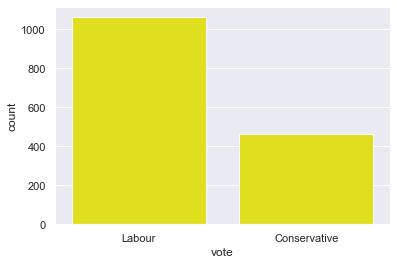

In [12]:
sns.countplot(x='vote',data=df_media,color='yellow')

1. Labour vote party is higher incompare to conservative vote criteria 

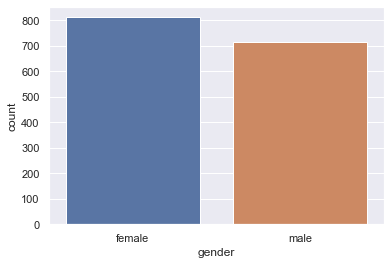

In [13]:
sns.countplot(x='gender',data=df_media)

1. In gender it seems female voter is higher than male voters

# Outliers Check:

Box plot and distplot of each variables:

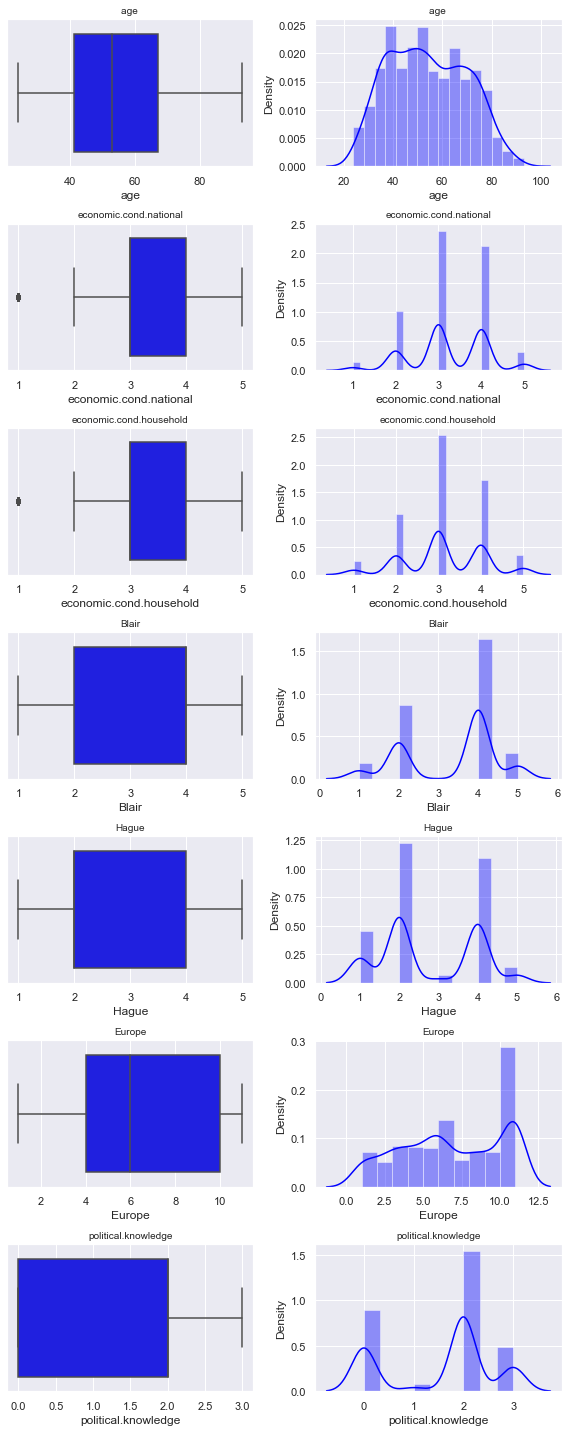

In [14]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(8,20)

a = sns.boxplot(df_media['age']  ,ax=axes[0][0],color='blue')
a.set_title("age ",fontsize=10)
plt.tight_layout()

a = sns.distplot(df_media['age'] , ax=axes[0][1],color='blue')
a.set_title("age ",fontsize=10)
plt.tight_layout()

a = sns.boxplot(df_media['economic.cond.national']  , ax=axes[1][0],color='blue')
a.set_title("economic.cond.national",fontsize=10)
plt.tight_layout()

a = sns.distplot(df_media['economic.cond.national'] , ax=axes[1][1],color='blue')
a.set_title("economic.cond.national",fontsize=10)
plt.tight_layout()

a = sns.boxplot(df_media['economic.cond.household'] , ax=axes[2][0],color='blue')
a.set_title("economic.cond.household",fontsize=10)
plt.tight_layout()

a = sns.distplot(df_media['economic.cond.household'] , ax=axes[2][1],color='blue')
a.set_title("economic.cond.household",fontsize=10)
plt.tight_layout()

a = sns.boxplot(df_media['Blair'] , ax=axes[3][0],color='blue')
a.set_title("Blair",fontsize=10)
plt.tight_layout()

a = sns.distplot(df_media['Blair']  , ax=axes[3][1],color='blue')
a.set_title("Blair",fontsize=10)
plt.tight_layout()

a = sns.boxplot(df_media['Hague'] , ax=axes[4][0],color='blue')
a.set_title("Hague",fontsize=10)
plt.tight_layout()

a = sns.distplot(df_media['Hague'] , ax=axes[4][1],color='blue')
a.set_title("Hague",fontsize=10)
plt.tight_layout()

a = sns.boxplot(df_media['Europe'], ax=axes[5][0],color='blue')
a.set_title("Europe",fontsize=10)
plt.tight_layout()

a = sns.distplot(df_media['Europe'], ax=axes[5][1],color='blue')
a.set_title("Europe",fontsize=10)
plt.tight_layout()

a = sns.boxplot(df_media['political.knowledge'] , ax=axes[6][0],color='blue')
a.set_title("political.knowledge",fontsize=10)
plt.tight_layout()

a = sns.distplot(df_media['political.knowledge'] , ax=axes[6][1],color='blue')
a.set_title("political.knowledge",fontsize=10)
plt.tight_layout()

plt.show()


1. None of the variable is normally distributed except age which has partial normal distribution

2. Two variables echonomical.cond.household and echonomical.cond.national is having outlier, so we will treat the outliers in data preparation part.

# Bi-Variate Analysis

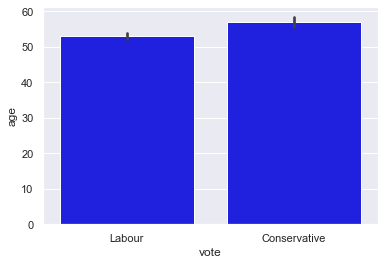

In [17]:
sns.barplot(x='vote',y='age',data=df_media,color='blue')

When age increases aged people prefer to vote for conservative party, though not much difference in comared with labour party

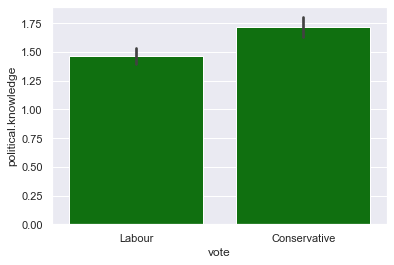

In [18]:
sns.barplot(x='vote',y='political.knowledge',data=df_media,color='green')

Having higher political knowledge prefers to vote for conservative

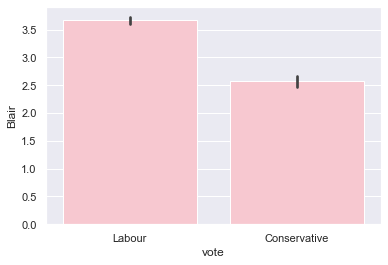

In [19]:
sns.barplot(x='vote',y='Blair',data=df_media,color='pink')

The more assesment of the labour leader increases the more chances of vote for labour party

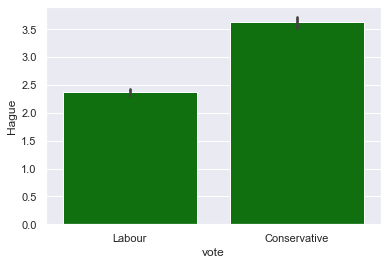

In [20]:
sns.barplot(x='vote',y='Hague',data=df_media,color='green')

The more assesement of conservative leader increases, the more chances for vote on conservatiive party

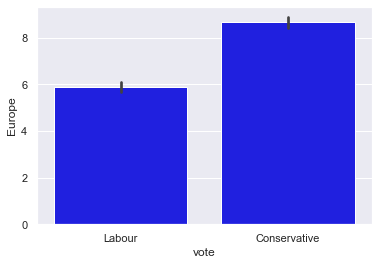

In [162]:
sns.barplot(x='vote',y='Europe',data=df_media,color='blue')

The more Eurosceptic sentiment, the more chance of vote for conservative party.

economic.cond.national: Assessment of current national economic conditions, 1 to 5.

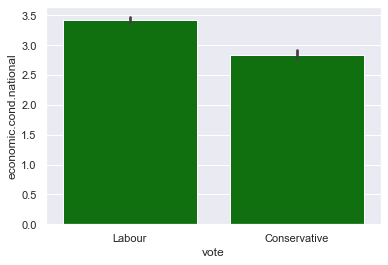

In [166]:
sns.barplot(x='vote',y='economic.cond.national',data=df_media,color='green')

When economic conditions for national become higher then chance of vote for labour party increases.

economic.cond.household: Assessment of current household economic conditions, 1 to 5.

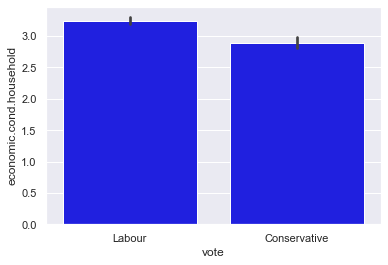

In [168]:
sns.barplot(x='vote',y='economic.cond.household',data=df_media,color='blue')

When economic conditions for household become higher then chance of vote for labour party increases.

# Multi-Variate Analysis

In [21]:
df_corr=df_media.corr()
analysis = pd.DataFrame(df_corr)

cm = sns.dark_palette("pink", reverse=True,as_cmap=True)

(analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


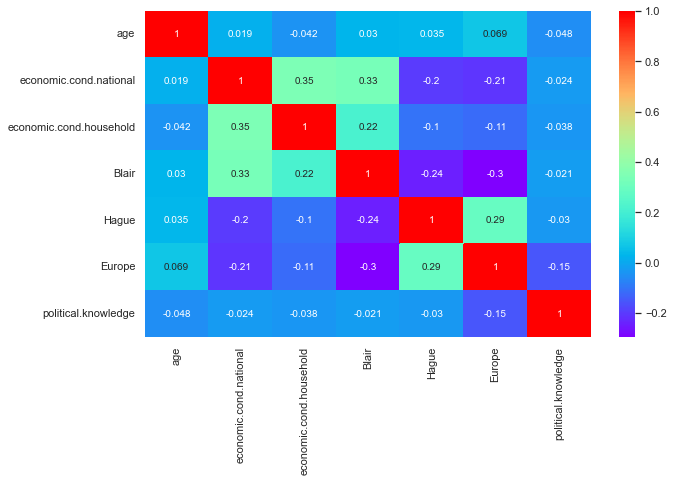

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df_media.corr(),annot=True,cmap='rainbow');

1. There is no multi-collnearity in the dataset

2. The correlation is very weak as highest correlation is 35% and almost all are having less than 10%.

3. There are both positive and negative correlations between variables.

4. As per the model building it is required assumption to not have any correlation in between variables.

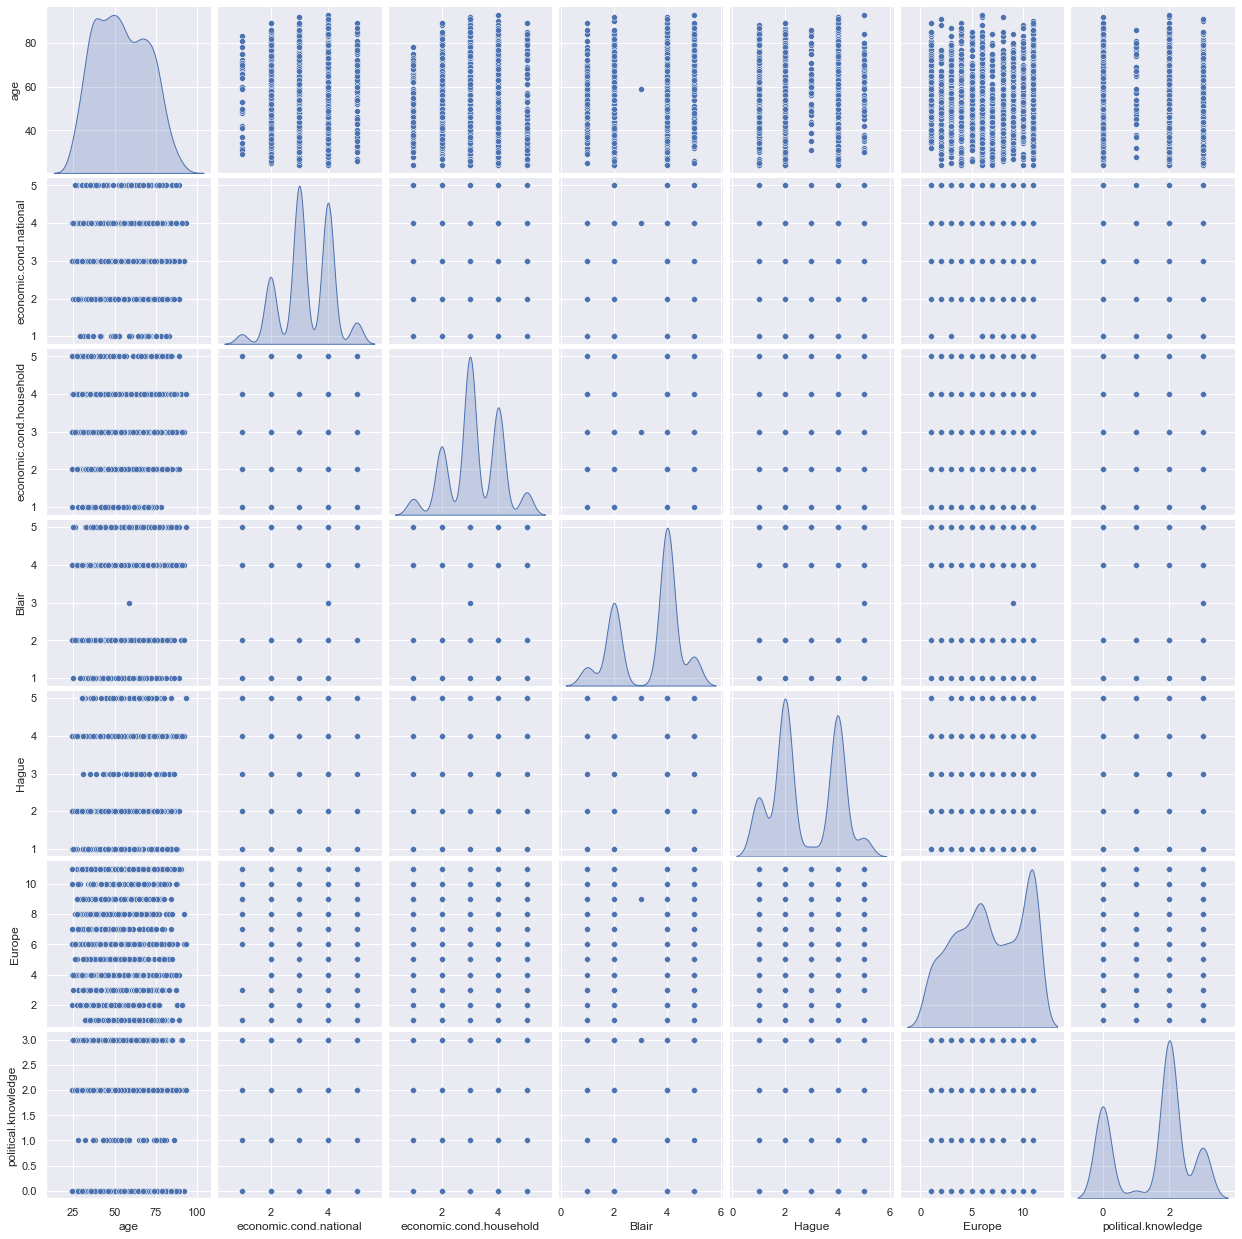

In [38]:
sns.pairplot(df_media,diag_kind='kde')

# Duplicate Check

In [306]:
duplicate=df_media.duplicated()
df_media[duplicate]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


**Removed Duplicates**

In [6]:
df_media.drop_duplicates(inplace=True)

In [7]:
df_media.duplicated().sum()

0

# Data Preparation:


# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

# Data Encoding:

In [313]:
df_media['vote'].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [315]:
df_media['gender'].value_counts()

female    808
male      709
Name: gender, dtype: int64

In [9]:
Categories= ['vote', 'gender']

In [10]:
df_media =pd.get_dummies(df_media, columns=Categories,drop_first=True)

In [11]:
df_media.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [22]:
#df_media.vote.replace(['Labour', 'Conservative' ],[1,0],inplace=True )

In [23]:
#df_media.gender.replace(['female', 'male' ],[1,0],inplace=True )

# variable name change

In [12]:
df_media.rename(columns={'vote_Labour':'Labour_party_Y/N'},inplace=True)

In [13]:
df_media.rename(columns={'gender_male':'Male_voter_Y/N'},inplace=True)

In [14]:
df_media.rename(columns={'age':'Age'},inplace=True)

In [15]:
df_media.rename(columns={'economic.cond.national':'Economic_cond_national'},inplace=True)

In [16]:
df_media.rename(columns={'economic.cond.household':'Economic_cond_household'},inplace=True)

In [17]:
df_media.rename(columns={'political.knowledge':'Political_knowledge'},inplace=True)

In [18]:
df_media.head()

,Age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,Labour_party_Y/N,Male_voter_Y/N
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


# Scalling Necessary?

1. In Logistics regression it is necessary to scale the dataset . But here data range does not seem to be highly ranged, so particulary for this dataset scaling does not required.

2. Also LDA finds coefficents between the variation between classes, so range of dataset does not matter.

3. Scalling necessary for KNN as long distance can be the cause of biased model, because it measures distance of data points.

4. Naive baised is not distance based and it is probability based so scalling does not required here.

# Outlier Treatment:

Economic_cond_national

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
lr,ur=remove_outlier(df_media["Economic_cond_national"])
df_media["Economic_cond_national"]=np.where(df_media["Economic_cond_national"]>ur,ur,df_media["Economic_cond_national"])
df_media["Economic_cond_national"]=np.where(df_media["Economic_cond_national"]<lr,lr,df_media["Economic_cond_national"])

Economic_cond_household

In [21]:
lr,ur=remove_outlier(df_media["Economic_cond_household"])
df_media["Economic_cond_household"]=np.where(df_media["Economic_cond_household"]>ur,ur,df_media["Economic_cond_household"])
df_media["Economic_cond_household"]=np.where(df_media["Economic_cond_household"]<lr,lr,df_media["Economic_cond_household"])

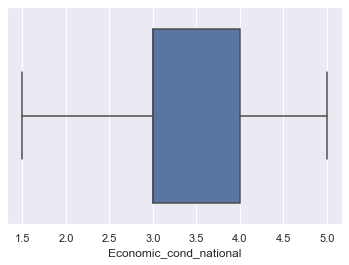

In [22]:
sns.boxplot(x='Economic_cond_national',data=df_media);

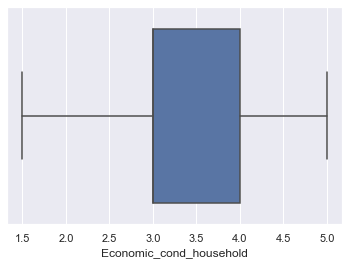

In [23]:
sns.boxplot(x='Economic_cond_household',data=df_media);

# Data Split:

In [24]:
X=df_media.drop('Labour_party_Y/N',axis=1)
Y=df_media['Labour_party_Y/N']

In [25]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

# Modeling:

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

# Logistics Regression:

In [26]:
grid={'penalty':['l2','none','l1'],
     'solver': ['sag','lbfgs','liblinear'],
     'tol':[0.0001,0.00001]}

In [27]:
model=LogisticRegression(max_iter=10000,n_jobs=-1)

In [28]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator = model, param_grid = grid, cv = 3, n_jobs=-1, scoring='f1')

In [29]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', 'l1'],
                         'solver': ['sag', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [30]:
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

In [31]:
best_model=grid_search.best_estimator_
best_model

LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', solver='liblinear')

In [32]:
y_train_predict_lg=best_model.predict(X_train)
y_test_predict_lg=best_model.predict(X_test)

In [33]:
LGR_Scores_train=best_model.score(X_train,Y_train)


In [34]:
LGR_Scores_test=best_model.score(X_test,Y_test)


In [35]:
print("Accuracy of LGR Train data set is: ", LGR_Scores_train)
print("Accuracy of LGR Test data set is: ", LGR_Scores_test)

Accuracy of LGR Train data set is:  0.8378887841658812
Accuracy of LGR Test data set is:  0.831140350877193


# LDA : Model building

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train, Y_train)

In [37]:
pred_train_lda=lda_model.predict(X_train)

pred_test_lda=lda_model.predict(X_test)

In [38]:
LDA_Scores_train=lda_model.score(X_train,Y_train)

In [39]:
LDA_Scores_test=lda_model.score(X_test,Y_test)

In [41]:
print("Accuracy of LDA Train data set is: ", LDA_Scores_train)
print("Accuracy of LDA Test data set is: ", LDA_Scores_test)

Accuracy of LDA Train data set is:  0.8341187558906692
Accuracy of LDA Test data set is:  0.831140350877193


**Inference**

1. LGR Modle seems to be overfitted as training accuracy is more in compare with test accuracy.

2. In LDA model as well it is sightly overfitted but difference between train and test score is not much.

3. Accuracy is completely same on test data for both LDA and LGR.

4. Both models have built without scaling the data as it is not necessary.


# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

**Here built the basic model to check the performance**

**In 1.6 Applying other techniques to KNN and Naive Byes**

# KNN Model:

In [42]:
from scipy.stats import zscore

In [43]:
X_scale=X.apply(zscore)

In [44]:
X_scale.head()

,Age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,Male_voter_Y/N
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y, train_size=0.70,random_state=1)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_train_predict_knn=KNN_model.predict(x_train)
KNN_model_score_train=KNN_model.score(x_train,y_train)

In [48]:
y_test_predict_knn=KNN_model.predict(x_test)
KNN_model_score_test=KNN_model.score(x_test,y_test)

In [49]:
print("Accuracy of KNN train data is:", KNN_model_score_train)
print("Accuracy of KNN test data is:", KNN_model_score_test)

Accuracy of KNN train data is: 0.8567389255419415
Accuracy of KNN test data is: 0.8267543859649122


# Naive Bayes:

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [51]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [52]:
Y_train_predict_bayes=NB_model.predict(X_train)
model_score_bayes_train=NB_model.score(X_train, Y_train)

In [53]:
Y_test_predict_bayes=NB_model.predict(X_test)
model_score_bayes_test=NB_model.score(X_test, Y_test)

In [54]:
print("Accuracy of Naive Byes train data is:", model_score_bayes_train)
print("Accuracy of Naive Byes test data is:", model_score_bayes_test)

Accuracy of Naive Byes train data is: 0.8341187558906692
Accuracy of Naive Byes test data is: 0.8223684210526315


**Inference**

1. KNN model seems to be over fitting model as there is difference between train and test accuracy. Train accuracy is higher than test accuracy.

2. Naive-Byes is having also over fitting but very little difference between train and test so it can be neglected as over fitting.

3. in between both the models, KNN test accuracy is little bit higher than NB.

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.


# Model Tuning (using grid search cv)

**Note: Grid search cv is already done for Logistic Regression in 1.5**

# Naive Byes:

1. var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean.

2. verbose is the verbosity: the higher, the more messages; in this case, it is set to 1.

3. cv is the cross-validation generator or an iterable, in this case, there is a 10-fold cross-validation.

4. n_jobs is the maximum number of concurrently running workers; in this case, it is set to -1 which implies that all CPUs are used

In [55]:
#from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, Y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s


GaussianNB(var_smoothing=0.0012328467394420659)


[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.3s finished


In [56]:
nbModel_grid.best_params_

{'var_smoothing': 0.0012328467394420659}

In [57]:
best_model_nb = nbModel_grid.best_estimator_
best_model_nb

GaussianNB(var_smoothing=0.0012328467394420659)

In [58]:
train_nb=best_model_nb.predict(X_train)
score_nb_grid_train=best_model_nb.score(X_train, Y_train)
score_nb_grid_train

0.8360037700282752

In [59]:
test_nb=best_model_nb.predict(X_test)
score_nb_grid_test=best_model_nb.score(X_test, Y_test)
score_nb_grid_test

0.8245614035087719

**There is a little improvement after applying grid search method**

# KNN

In [65]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [66]:
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [67]:
grid_search_knn=knn_grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.5s finished


In [68]:
knn_grid.best_params_

{'n_neighbors': 18}

In [69]:
best_model_knn = knn_grid.best_estimator_
best_model_knn

KNeighborsClassifier(n_neighbors=18)

In [70]:
train_knn=best_model_knn.predict(x_train)
train_knn_score=best_model_knn.score(x_train, y_train)
train_knn_score

0.8416588124410933

In [71]:
test_knn=best_model_knn.predict(x_test)
test_knn_score=best_model_knn.score(x_test, y_test)
test_knn_score

0.8421052631578947

**Performance has improved after grid search on KNN**

# LDA

In [72]:
from sklearn.model_selection import RepeatedStratifiedKFold
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
lda = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_lda = GridSearchCV(lda , grid, scoring='accuracy', cv=cv,n_jobs=-1)

In [73]:
grid_search_lda=grid_lda.fit(X_train, Y_train)

In [74]:
grid_lda.best_params_

{'solver': 'lsqr'}

In [75]:
best_model_lda = grid_lda.best_estimator_
best_model_lda 

LinearDiscriminantAnalysis(solver='lsqr')

In [76]:
train_lda=best_model_lda .predict(X_train)
train_lda_score=best_model_lda .score(X_train, Y_train)
train_lda_score

0.8350612629594723

In [77]:
test_lda=best_model_lda .predict(X_test)
test_lda_score=best_model_lda .score(X_test, Y_test)
test_lda_score

0.831140350877193

**Performance did not improve for test data set, but has improved for train data**

# Bagging:

In [125]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble.forest import RandomForestClassifier
rf = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

# Boosting Train (Ada)

In [113]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

# Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, Y_train)

# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized

# Performance Metrics: Logistic Regression

Logistic Regression Train:

Accuracy:

In [78]:
LGR_Scores_train=best_model.score(X_train,Y_train)
LGR_Scores_train

0.8378887841658812

confusion matrix:

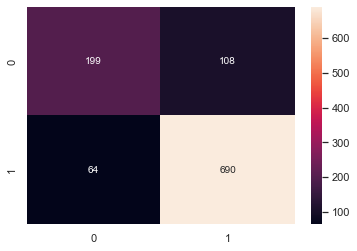

In [79]:
sns.heatmap(confusion_matrix(Y_train,y_train_predict_lg),annot=True,fmt='.5g')

Classification report:

In [80]:
classification_report_lrg=metrics.classification_report(Y_train,y_train_predict_lg)

print(classification_report_lrg)

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



Roc_Auc Score

AUC: 0.891


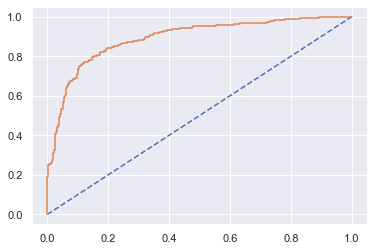

In [147]:
probs=best_model.predict_proba(X_train)
probs=probs[:,1]
auc_lgr_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_lgr_train)
train_fpr_lg,train_tpr_lg,train_thershold_lg=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_lg,train_tpr_lg);

Logistic Regression Test

Accuracy:

In [82]:
LGR_Scores_test=best_model.score(X_test,Y_test)
LGR_Scores_test

0.831140350877193

cofusion matrix:

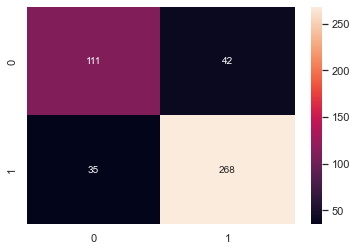

In [84]:
sns.heatmap(confusion_matrix(Y_test, y_test_predict_lg),annot=True,fmt='.5g')

Classification report:

In [85]:
classification_report_lrg_test=metrics.classification_report(Y_test, y_test_predict_lg)

print(classification_report_lrg_test)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.881


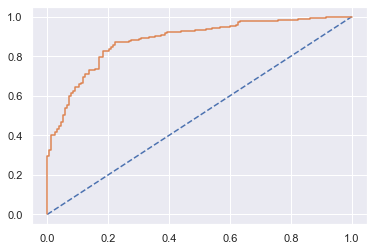

In [148]:
probs=best_model.predict_proba(X_test)
probs=probs[:,1]
auc_lgr_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_lgr_test)
test_fpr_lg,test_tpr_lg,test_thershold_lg=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_lg,test_tpr_lg);

# Performance Metrics: LDA

Train Data:

Accuracy:

In [86]:
LDA_Scores_train=best_model_lda.score(X_train,Y_train)
LDA_Scores_train

0.8350612629594723

Classification report:

In [87]:
classification_lda_train=metrics.classification_report(Y_train, train_lda)

print(classification_lda_train)

              precision    recall  f1-score   support

           0       0.74      0.65      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



confusion metrics:

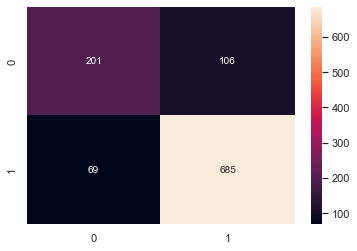

In [89]:
sns.heatmap(confusion_matrix(Y_train, train_lda),annot=True,fmt='.5g')

Roc_Auc_Score:

AUC: 0.890


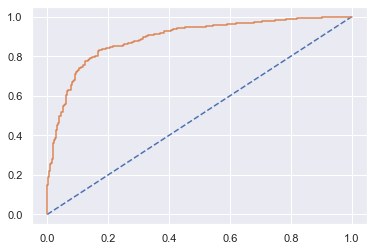

In [90]:
probs=best_model_lda.predict_proba(X_train)
probs=probs[:,1]
auc_lda_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_lda_train)
train_fpr_lda,train_tpr_lda,train_thershold_lda=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_lda,train_tpr_lda);

Test Data

Accuracy:

In [91]:
LDA_Scores_test=best_model_lda.score(X_test,Y_test)
LDA_Scores_test

0.831140350877193

confusion metrics:

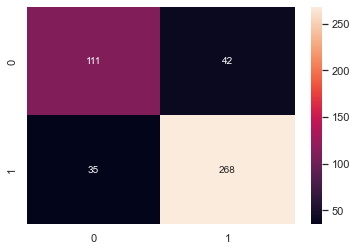

In [92]:
sns.heatmap(confusion_matrix(Y_test, test_lda),annot=True,fmt='.5g')

classification report:

In [93]:
classification_lda_test=metrics.classification_report(Y_test, test_lda)

print(classification_lda_test)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



Roc_Auc_Score

AUC: 0.888


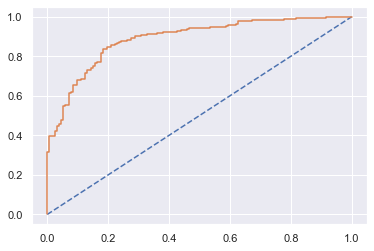

In [94]:
probs=best_model_lda.predict_proba(X_test)
probs=probs[:,1]
auc_lda_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_lda_test)
test_fpr_lda,test_tpr_lda,test_thershold_lda=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_lda,test_tpr_lda);

# Performance Metrics:KNN

Train data:

Accuracy:

In [95]:
KNN_model_score_train= best_model_knn.score(x_train, y_train)
KNN_model_score_train

0.8416588124410933

Classificaion report

In [96]:
print(metrics.classification_report(y_train,train_knn))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



Confusion Metrics:

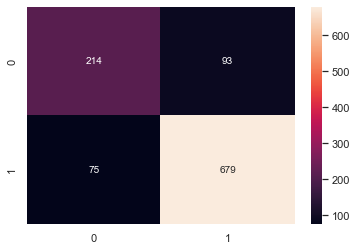

In [97]:
sns.heatmap(confusion_matrix(y_train, train_knn),annot=True,fmt='.5g')

roc_auc curve

AUC: 0.904


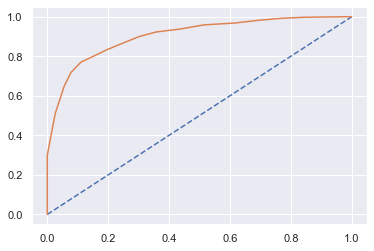

In [98]:
probs=best_model_knn.predict_proba(x_train)
probs=probs[:,1]
auc_knn_train=roc_auc_score(y_train,probs)
print('AUC: %.3f' %auc_knn_train)
train_fpr_knn,train_tpr_knn,train_thershold_knn=roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_knn,train_tpr_knn);

Test Data:

Accuracy:

In [99]:
KNN_model_score_test = best_model_knn.score(x_test,y_test)
KNN_model_score_test

0.8421052631578947

Classification Report:

In [100]:
print(metrics.classification_report(y_test,test_knn))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       153
           1       0.86      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456



Confusion Metrics

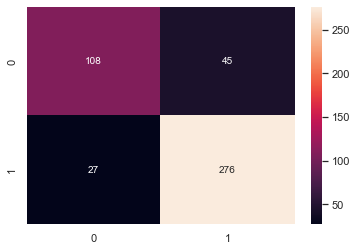

In [101]:
sns.heatmap(confusion_matrix(y_test, test_knn),annot=True,fmt='.5g')

Roc_Auc curve

AUC: 0.888


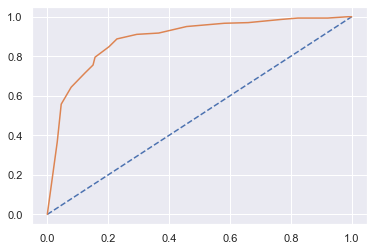

In [102]:
probs=best_model_knn.predict_proba(x_test)
probs=probs[:,1]
auc_knn_test=roc_auc_score(y_test,probs)
print('AUC: %.3f' %auc_knn_test)
test_fpr_knn,test_tpr_knn,test_thershold_knn=roc_curve(y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_knn,test_tpr_knn);

# Performance Metrics: Naive Bayes

Train data:

Accuracy:

In [103]:
model_score_bayes_train = best_model_nb.score(X_train, Y_train)
model_score_bayes_train

0.8360037700282752

Classification Report:

In [104]:
print(metrics.classification_report(Y_train,train_nb))

              precision    recall  f1-score   support

           0       0.73      0.68      0.71       307
           1       0.87      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



Confusion Metrics:

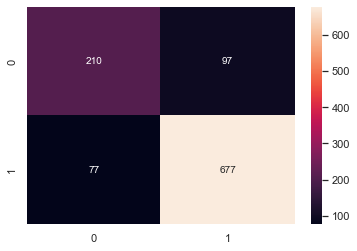

In [105]:
sns.heatmap(confusion_matrix(Y_train,train_nb),annot=True,fmt='.5g')

AUC: 0.887


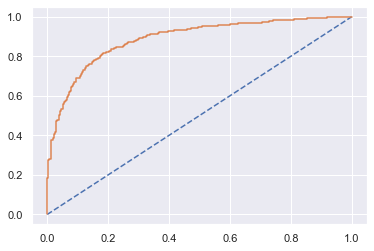

In [106]:
probs=best_model_nb.predict_proba(X_train)
probs=probs[:,1]
auc_nb_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_nb_train)
train_fpr_nb,train_tpr_nb,train_thershold_nb=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_nb,train_tpr_nb);

Test Data:

Accuracy

In [107]:
model_score_bayes_test = best_model_nb.score(X_test, Y_test)
model_score_bayes_test

0.8245614035087719

Confusion Metrics

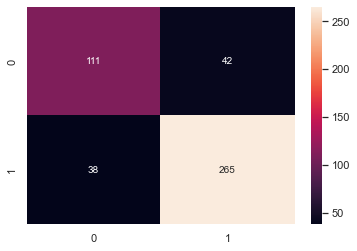

In [108]:
sns.heatmap(confusion_matrix(Y_test,test_nb),annot=True,fmt='.5g')

Classification Report

In [109]:
print(metrics.classification_report(Y_test,test_nb))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Auc_Roc_curve

AUC: 0.887


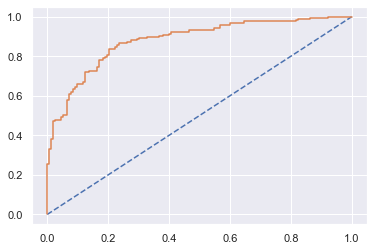

In [110]:
probs=best_model_nb.predict_proba(X_test)
probs=probs[:,1]
auc_nb_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_nb_train)
test_fpr_nb,test_tpr_nb,test_thershold_nb=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_nb,test_tpr_nb);

# Boosting ADA

Train data:

In [115]:
y_train_predict_adb = ADB_model.predict(X_train)
y_test_predict_adb = ADB_model.predict(X_test)

In [116]:
model_score_adb_train = ADB_model.score(X_train, Y_train)
model_score_adb_train

0.8501413760603205

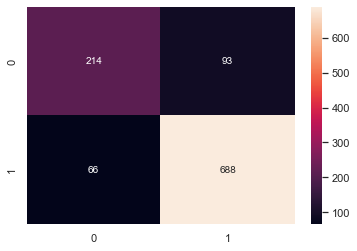

In [117]:
sns.heatmap(confusion_matrix(Y_train,y_train_predict_adb),annot=True,fmt='.5g')

In [118]:
print(metrics.classification_report(Y_train,y_train_predict_adb))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.915


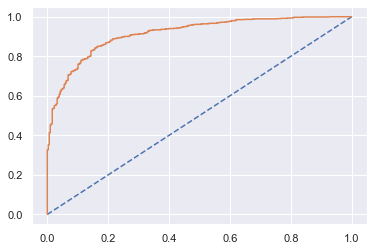

In [119]:
probs=ADB_model.predict_proba(X_train)
probs=probs[:,1]
auc_adb_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_adb_train)
train_fpr_adb,train_tpr_adb,train_thershold_adb=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_adb,train_tpr_adb);

Test data:

Accuracy:

In [120]:
model_score_adb_test = ADB_model.score(X_test, Y_test)
model_score_adb_test

0.8135964912280702

Confusion Metrics:

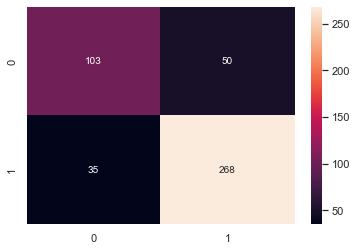

In [121]:
sns.heatmap(confusion_matrix(Y_test,y_test_predict_adb),annot=True,fmt='.5g')

classification report:

In [122]:
print(metrics.classification_report(Y_test,y_test_predict_adb))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



Roc_Auc_Curve

AUC: 0.877


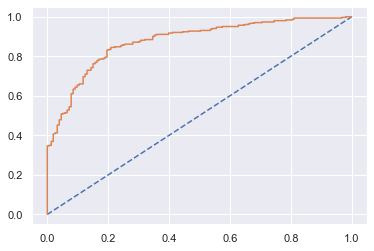

In [123]:
probs=ADB_model.predict_proba(X_test)
probs=probs[:,1]
auc_adb_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_adb_test)
test_fpr_adb,test_tpr_adb,test_thershold_adb=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_adb,test_tpr_adb);

# Bagging:

In [127]:
y_train_predict_bag = Bagging_model.predict(X_train)
y_test_predict_bag = Bagging_model.predict(X_test)

Train data:

Accuracy:

In [128]:
model_score_bag_train = Bagging_model.score(X_train, Y_train)
model_score_bag_train

0.9679547596606974

Confusion Matrics:

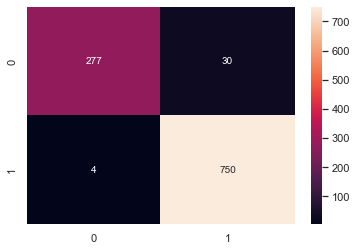

In [129]:
sns.heatmap(confusion_matrix(Y_train,y_train_predict_bag),annot=True,fmt='.5g')

Classification report:

In [130]:
print(metrics.classification_report(Y_train,y_train_predict_bag))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



Auc_Roc_Curve:

AUC: 0.997


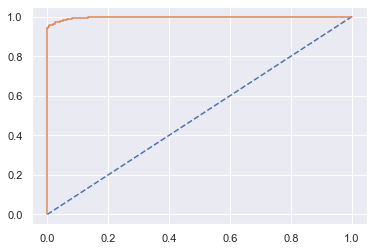

In [131]:
probs=Bagging_model.predict_proba(X_train)
probs=probs[:,1]
auc_bg_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_bg_train)
train_fpr_bg,train_tpr_bg,train_thershold_bg=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_bg,train_tpr_bg);

Test Data

Accuracy

In [132]:
model_score_bag_test = Bagging_model.score(X_test, Y_test)
model_score_bag_test

0.8289473684210527

Confusion Matrics:

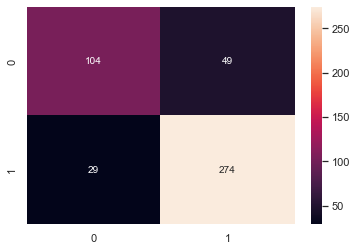

In [133]:
sns.heatmap(confusion_matrix(Y_test,y_test_predict_bag),annot=True,fmt='.5g')

Classification Report

In [134]:
print(metrics.classification_report(Y_test,y_test_predict_bag))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.897


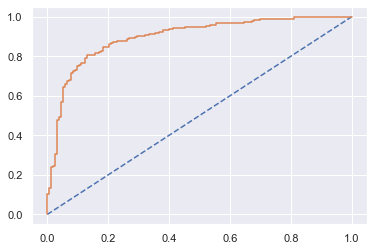

In [135]:
probs=Bagging_model.predict_proba(X_test)
probs=probs[:,1]
auc_bg_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_bg_test)
test_fpr_bg,test_tpr_bg,test_thershold_bg=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_bg,test_tpr_bg);

# Gradient Boosting:

In [136]:
y_train_predict_gb = gbcl.predict(X_train)
y_test_predict_gb = gbcl.predict(X_test)

Train data:

Accuracy:

In [137]:
gb_train_model_score=gbcl.score(X_train,Y_train)
gb_train_model_score

0.8925541941564562

Confusion matrics:

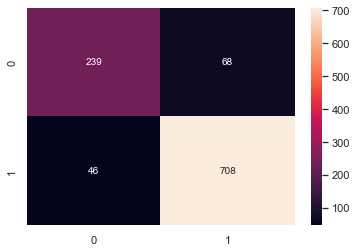

In [138]:
sns.heatmap(confusion_matrix(Y_train,y_train_predict_gb),annot=True,fmt='.5g')

Classification Report:

In [139]:
print(metrics.classification_report(Y_train,y_train_predict_gb))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



Auc_Roc_Curve:

AUC: 0.951


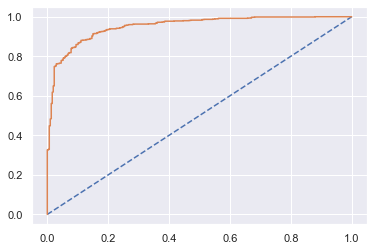

In [140]:
probs=gbcl.predict_proba(X_train)
probs=probs[:,1]
auc_gb_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_gb_train)
train_fpr_gb,train_tpr_gb,train_thershold_gb=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_gb,train_tpr_gb);

Test Data:

Accuracy:

In [141]:
gb_test_model_score=gbcl.score(X_test,Y_test)
gb_test_model_score

0.8355263157894737

Confusion Matrics:

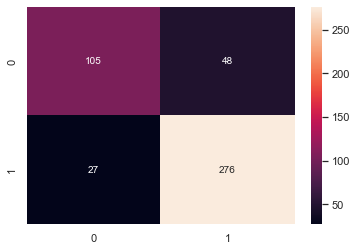

In [142]:
sns.heatmap(confusion_matrix(Y_test,y_test_predict_gb),annot=True,fmt='.5g')

Classification report:

In [143]:
print(metrics.classification_report(Y_test,y_test_predict_gb))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



Auc_Roc_Curve:

AUC: 0.899


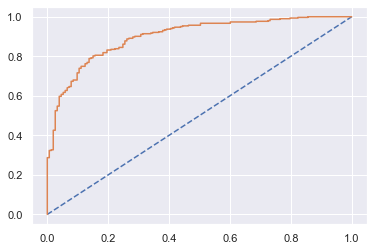

In [144]:
probs=gbcl.predict_proba(X_test)
probs=probs[:,1]
auc_gb_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_gb_test)
test_fpr_gb,test_tpr_gb,test_thershold_gb=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_gb,test_tpr_gb);

# Final model and Insights:

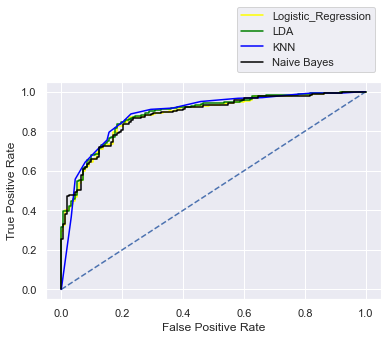

In [149]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_lg,test_tpr_lg,color='yellow',label="Logistic_Regression")
plt.plot(test_fpr_lda,test_tpr_lda,color='green',label="LDA")
plt.plot(test_fpr_knn,test_tpr_knn,color='blue',label="KNN")
plt.plot(test_fpr_nb,test_tpr_nb,color='black',label="Naive Bayes")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

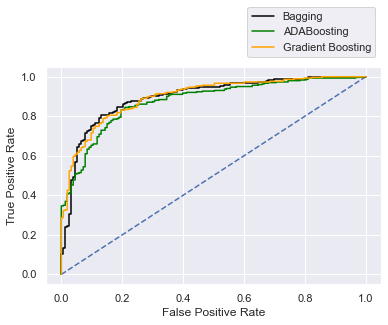

In [150]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_bg,test_tpr_bg,color='black',label="Bagging")
plt.plot(test_fpr_adb,test_tpr_adb,color='green',label="ADABoosting")
plt.plot(test_fpr_gb,test_tpr_gb,color='orange',label="Gradient Boosting")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [153]:
train_scores=[LGR_Scores_train,LDA_Scores_train,KNN_model_score_train,model_score_bayes_train,model_score_bag_train,model_score_adb_train,gb_train_model_score]
test_scores=[LGR_Scores_test,LDA_Scores_test,KNN_model_score_test,model_score_bayes_test,model_score_bag_test,model_score_adb_test,gb_test_model_score]
auc_train=[auc_lgr_train,auc_lda_train,auc_knn_train,auc_nb_train,auc_bg_train,auc_bg_train,auc_gb_train]
auc_test=[auc_lgr_test,auc_lda_test,auc_knn_test,auc_nb_test,auc_bg_test,auc_bg_test,auc_gb_test]
recall_train=[0.92,0.91,0.90,0.90,0.99,0.91,0.94]
recall_test=[0.88,0.88,0.91,0.87,0.90,0.88,0.91]
precision_train=[0.86,0.87,0.88,0.87,0.96,0.88,0.91]
precision_test=[0.86,0.86,0.86,0.86,0.85,0.84,0.85]
f1score_train=[0.89,0.89,0.89,0.89,0.98,0.90,0.93]
f1score_test=[0.87,0.87,0.88,0.87,0.88,0.86,0.88]
performance_comp=(pd.DataFrame({'Train_Accuracy': train_scores,'Test_Accuracy': test_scores,'Train_AUC':auc_train,'Test_AUC': auc_test,'Train_Recall':recall_train,'Test_Recall': recall_test,'Train_precision':precision_train,'Test_precision': precision_test,'Train_f1':f1score_train,'Test_f1': f1score_test},
            index=['Logistic Regression','LDA','KNN','N-Bayes','Bagging','ADABoosting','Gradient-Boosting']))

performance_comp.iloc[0:7,:].T 

,Logistic Regression,LDA,KNN,N-Bayes,Bagging,ADABoosting,Gradient-Boosting
Train_Accuracy,0.837889,0.835061,0.841659,0.836004,0.967955,0.850141,0.892554
Test_Accuracy,0.831140,0.831140,0.842105,0.824561,0.828947,0.813596,0.835526
Train_AUC,0.890642,0.889942,0.903971,0.887069,0.997391,0.997391,0.951155
Test_AUC,0.880563,0.887530,0.888468,0.879613,0.896654,0.896654,0.899362
Train_Recall,0.920000,0.910000,0.900000,0.900000,0.990000,0.910000,0.940000
Test_Recall,0.880000,0.880000,0.910000,0.870000,0.900000,0.880000,0.910000
Train_precision,0.860000,0.870000,0.880000,0.870000,0.960000,0.880000,0.910000
Test_precision,0.860000,0.860000,0.860000,0.860000,0.850000,0.840000,0.850000
Train_f1,0.890000,0.890000,0.890000,0.890000,0.980000,0.900000,0.930000
Test_f1,0.870000,0.870000,0.880000,0.870000,0.880000,0.860000,0.880000


•	KNN is having highest test accuracy in compared with others.

•	Gradient Boosting Auc score for test data is better than others.

•	KNN and Gradient Boosting test recall rate is better than others.

•	Precision for test data is same for LDA, KNN, N-Byes and Logistic regression.

•	KNN, Bagging and Gradient boosting is having highest test F1 Score.

•	All the models are having almost equivalent performance. However, as need to choose one, so we can go for KNN as it is having highest test accuracy and model is symmetrical as there is not much difference in test and train score. Though, little bit under-fitting but it can be neglected as not much difference.

•	KNN is having good recall rate and F1 score as well.

•	As per the ROC_curve, it is cleared that KNN is having better true positive curve in compared to N-Bayes, LDA and logistic regression.



# 1.8 Based on these predictions, what are the insights?

**Insights**

•	As per the data given, labor party is having highest vote when in compare to the conservative party.

•	Most of the voters are the female voters.

•	When age increases, mostly they prefer to vote for conservative party.

•	When it comes to political knowledge, higher the knowledge higher the vote for conservative party.

•	Party win is highly dependent on party assessment. As we can clearly see, the more assessment the more chance for win. So it is one of the important factor to consider.

•	Attitude towards European Integration is another huge factor. The more Eurosceptic sentiment, there is a chance of voting for conservative party.

•	Economic condition also has high impact on vote, when condition grows in national and household both side than chance for labour vote party wining also increases.


**Prediction**

**Checking the Unique Values**

In [ ]:
Name: economic.cond.national
1     37
5     82
2    257
4    542
3    607

Name: economic.cond.household
1     65
5     92
2    280
4    440
3    648

Name: Blair
3      1
1     97
5    153
2    438
4    836

Name: Hague
3     37
5     73
1    233
4    558
2    624

Name: Europe
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338

Name: political.knowledge
1     38
3    250
0    455
2    782

•	If we check economic condition for national value counts in the given data set, 1 means low economic and 5 means high economic growth. In this dataset, 1 is very less which is only 37 and 2, 4 and 3 are having count high. And same is applied with household economic condition. So the condition is moderate, it is not too high or too low. Therefore, from these two attributes can predict there is chance of wining of Labor party as the economic condition is moderate and not too low.

•	In Blair and Hauge, 5 represents more assessment and 1 low. As per the given data, value of 1 is higher in Hauge and value of 5 is higher in Blair. Which shows Labour party is doing more assessment in compared to Conservative. So, there is a chance of wining here as well for labour party.

•	Eurosceptic mentality people are higher in the data set, which can be a problem for Labour party. As they prefer to vote conservative party. So here the statistics goes in support of conservative.

•	When it comes to political knowledge it seems 250 people is having highest knowledge and 455 people who does not have any political knowledge. People having moderate knowledge mostly around 782. As more people having moderate knowledge, there is little chance of wining of conservative party here.


**Conclusion**

Most of the attributes are predicting the wining of Labour Party. And as per the model which we have chosen (KNN) is having high true positive rate. So the model is also predicting the wining of Labour party. 
Still need more attribute for further analysis and confirmation.


# Problem 2:


In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

Code Snippet to extract the three speeches:

"
import nltk

nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

inaugural.raw('1941-Roosevelt.txt')

inaugural.raw('1961-Kennedy.txt')

inaugural.raw('1973-Nixon.txt')

"

In [171]:
import re
from nltk.tokenize import regexp_tokenize
from random import shuffle,uniform
from math import e , pow , log
import nltk
from nltk.corpus import inaugural

In [172]:
np.__version__

'1.19.5'

In [173]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)

Numpy version: 1.19.5
Pandas version: 1.0.5
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.2.5


In [174]:
nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

inaugural.raw('1941-Roosevelt.txt')

inaugural.raw('1961-Kennedy.txt')

inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\jpradhan\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

# 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [175]:
file_names = inaugural.fileids()
print(file_names)

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

# Word Count

File = "1961-Kennedy.txt"

In [175]:
all_words = inaugural.words()

In [176]:
Kennedy = inaugural.fileids()[43]
print(Kennedy)

1961-Kennedy.txt


In [177]:
word_list_k = inaugural.words(Kennedy)
print(word_list_k)

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]


No of unique words:

In [178]:
word_list_k = [w.lower() for w in word_list_k]  # handle the case sensitivity
unique_words_kennedy = len(set(word_list_k))
unique_words_kennedy

546

No of total words:

In [179]:
word_list_kennedy = len(inaugural.words(Kennedy))
word_list_kennedy 

1546

File = "1973-Nixon.txt"

In [180]:
nixon = inaugural.fileids()[46]
print(nixon)

1973-Nixon.txt


In [181]:
word_list_n = inaugural.words(nixon)
print(word_list_n)

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]


No of unique words:

In [182]:
word_list_n = [w.lower() for w in word_list_n]  # handle the case sensitivity
unique_words_nixon = len(set(word_list_n))
unique_words_nixon

516

No of total words:

In [183]:
word_list_nixon = len(inaugural.words(nixon))
word_list_nixon 

2028

File = "1941-Roosevelt.txt"

In [184]:
Roosevelt= inaugural.fileids()[38]
print(Roosevelt)

1941-Roosevelt.txt


In [185]:
word_list_r = inaugural.words(Roosevelt)
print(word_list_r)

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]


No of unique words:

In [186]:
word_list_r = [w.lower() for w in word_list_r]  # handle the case sensitivity
unique_words_Roosevelt = len(set(word_list_r))
unique_words_Roosevelt

502

No of total words:

In [187]:
word_list_Roosevelt = len(inaugural.words(Roosevelt))
word_list_Roosevelt 

1536

# Character Count

File = "1961-Kennedy.txt"

In [188]:
char_list_k = inaugural.raw(Kennedy)

In [189]:
character_kennedy = len(char_list_k)
character_kennedy

7618

File = "1973-Nixon.txt"

In [190]:
char_list_n = inaugural.raw(nixon)

In [191]:
character_nixon = len(char_list_n)
character_nixon

9991

File = "1941-Roosevelt.txt"

In [192]:
char_list_r = inaugural.raw(Roosevelt)

In [193]:
character_Roosevelt = len(char_list_r)
character_Roosevelt

7571

# Sentence Count 

sents() will count sentence and also it considers the empty line between two sentence as a line

In [194]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

#sentences = sent_tokenize(k_df) # NLTK function


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jpradhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

File = "1961-Kennedy.txt"

In [195]:
sent_list_k = inaugural.sents(Kennedy)

In [196]:
sent_kennedy = len(sent_list_k)
sent_kennedy

52

File = "1973-Nixon.txt"

In [197]:
sent_list_n = inaugural.sents(nixon)

In [198]:
sent_nixon = len(sent_list_n)
sent_nixon

69

File = "1941-Roosevelt.txt"

In [199]:
sent_list_r = inaugural.sents(Roosevelt)

In [200]:
sent_Roosevelt = len(sent_list_r)
sent_Roosevelt

68

# Final Count:

In [201]:
word_count=[word_list_kennedy,word_list_nixon,word_list_Roosevelt]
character_count=[character_kennedy,character_nixon,character_Roosevelt]
sentence_count=[sent_kennedy,sent_nixon,sent_Roosevelt]
performance_comp=(pd.DataFrame({'Word_Count': word_count,'Character_Count': character_count,'Sentence_Count':sentence_count},
            index=['1961-Kennedy.txt','1973-Nixon.txt','1941-Roosevelt.txt']))

performance_comp.iloc[0:3,:].T 

,1961-Kennedy.txt,1973-Nixon.txt,1941-Roosevelt.txt
Word_Count,1546,2028,1536
Character_Count,7618,9991,7571
Sentence_Count,52,69,68


# 2.2 Remove all the stopwords from all three speeches

# Check English Stop Words

In [202]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jpradhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'whe

# Removing Stop words present in .txt files

In [203]:
import string
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

1961-Kennedy.txt

In [204]:
all_words_clean_kennedy = [word for word in word_list_k if word not in stopwords]

1973-Nixon.txt

In [205]:
all_words_clean_nixon = [word for word in word_list_n if word not in stopwords]

1941-Roosevelt.txt

In [206]:
all_words_clean_Roosevelt = [word for word in word_list_r if word not in stopwords]

# Removal of panctuation:

In [207]:
clean_kennedy=[i.replace('[^\w\s]','') for i in all_words_clean_kennedy]

In [208]:
clean_nixon=[i.replace('[^\w\s]','') for i in all_words_clean_nixon]

In [209]:
clean_Roosevelt=[i.replace('[^\w\s]','') for i in all_words_clean_Roosevelt]

# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [220]:
nltk.FreqDist(clean_kennedy).most_common(5)


[('--', 25), ('let', 16), ('us', 12), ('world', 8), ('sides', 8)]

In [212]:
nltk.FreqDist(clean_nixon).most_common(3) 

[('us', 26), ('let', 22), ('america', 21)]

In [221]:
nltk.FreqDist(clean_Roosevelt).most_common(6) 

[('--', 25),
 ('nation', 12),
 ('know', 10),
 ('spirit', 9),
 ('life', 9),
 ('democracy', 9)]

# 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [222]:
from wordcloud import WordCloud

1961-Kennedy.txt

Word Cloud for Speach of Kennedy happeed in 1961!!


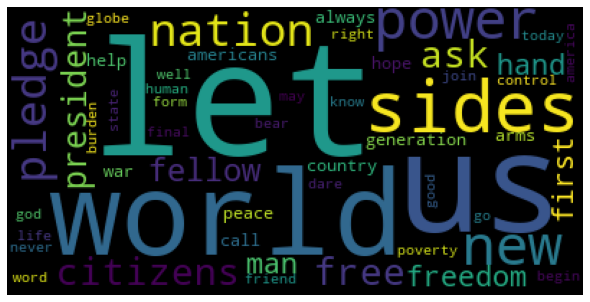

In [224]:
string_text_k = ' '.join(clean_kennedy) 
word_cloud = WordCloud(collocations = False, background_color = 'black',min_font_size = 10, random_state=100).generate(str(string_text_k))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speach of Kennedy happeed in 1961!!")
plt.show()

1973-Nixon.txt

Word Cloud for Speach of Nixon happened in 1973!!


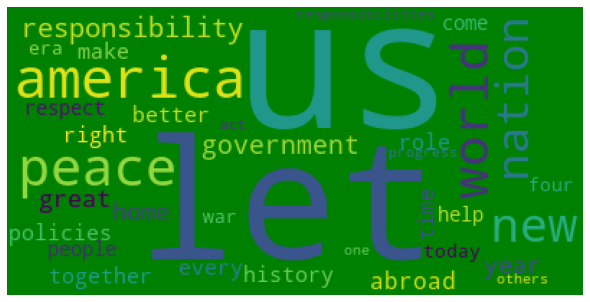

In [225]:
string_text_n = ' '.join(clean_nixon) 
word_cloud = WordCloud(collocations = False, background_color = 'green',min_font_size = 10, random_state=100).generate(str(string_text_n))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speach of Nixon happened in 1973!!")
plt.show()

1941-Roosevelt.txt

Word Cloud for Speach of Roosevelt happened in 1941!!


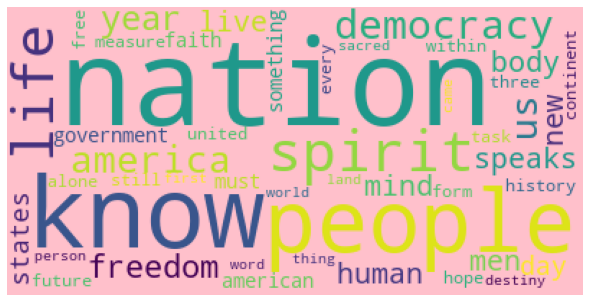

In [226]:
string_text_r = ' '.join(clean_Roosevelt) 
word_cloud = WordCloud(collocations = False, background_color = 'pink',min_font_size = 10, random_state=100).generate(str(string_text_r))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speach of Roosevelt happened in 1941!!")
plt.show()